# Cancellations and Delays in US Flights from 2006-2008
## by Mike Chung

## Investigation Overview

> For all the travel-lovers out there, we wanted to investigate US flight data from 2006-2008 to see what months were less likely to be cancelled or delayed. Also, we wanted to look in-depth and see the reasons for the delays and cancellations for each mont.

## Dataset Overview

> The United States Department of Transportation's Bureau of Transportation Statistics tracks the performance of domestic flights operated by large air carriers. We downloaded US flight data from 2006-2008 from ASA's <a href='http://stat-computing.org/dataexpo/2009/the-data.html'>Statistic Computing and Graphics website</a> and used the data about cancellations, delays and flight air time for our investigation.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('us_flights_2006-2008_clean.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Cancelled and Delayed Flights and the Reasons

> Carrier and weather was the most common cancellation reason

> NAS, carrier and late aircraft was the most common delay reason

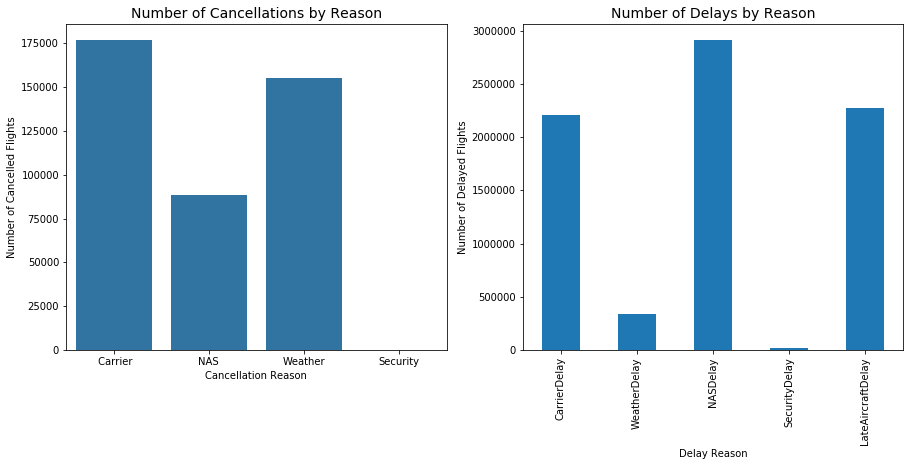

In [4]:
plt.figure(figsize = (15, 6));

# bar chart of the count of each cancellation reason
plt.subplot(1, 2, 1)
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'CancellationReason', color = base_color);
plt.ylabel('Number of Cancelled Flights');
plt.xlabel('Cancellation Reason');
plt.title('Number of Cancellations by Reason', fontsize = 14);

# bar chart of the mean delay time for each delay reason
plt.subplot(1, 2, 2)
df[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].count().plot(kind = 'bar', color = base_color);
plt.ylabel('Number of Delayed Flights');
plt.xlabel('Delay Reason');
plt.title('Number of Delays by Reason', fontsize = 14);

## Cancelled Flights by Reason and Month

> Weather cancellations happened more in the winter months, especially December and February

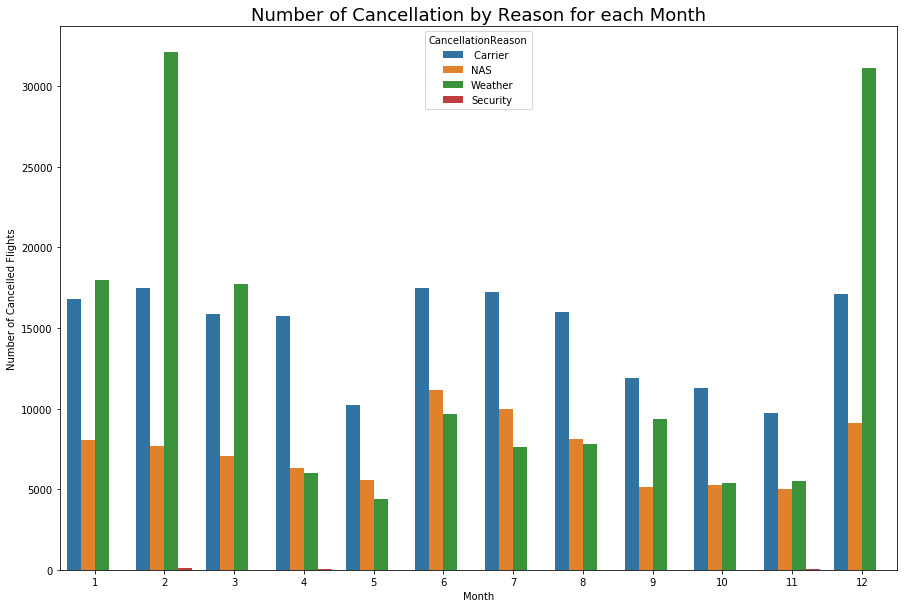

In [6]:
# clustered bar chart of the cancellation reason counts for each month
plt.figure(figsize = (15, 10));
sb.countplot(data = df, x = 'Month', hue = 'CancellationReason');
plt.ylabel('Number of Cancelled Flights');
plt.title('Number of Cancellation by Reason for each Month', fontsize = 18);

## Percentage of Cancelled Flights by Month

> May, October and November are nice months to travel, avoid December and February

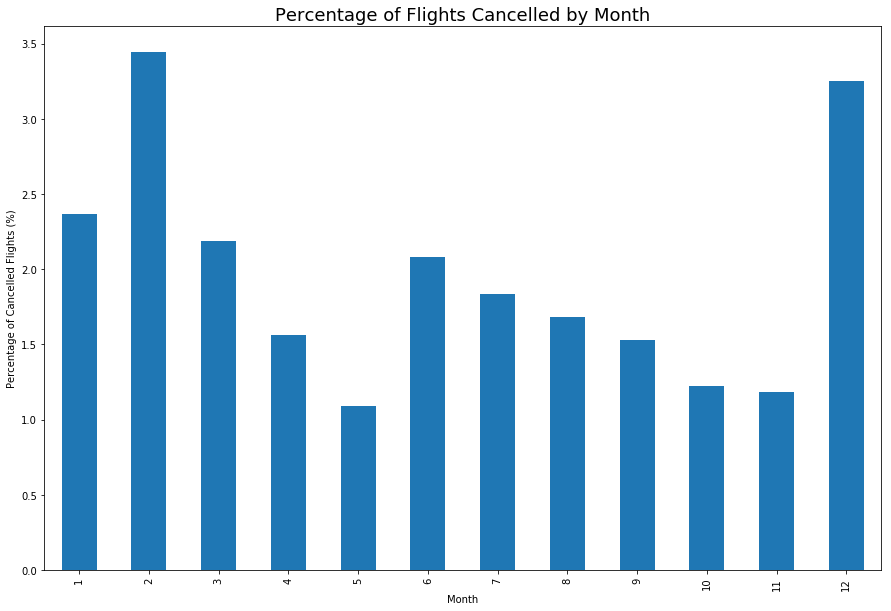

In [7]:
# bar chart of the cancellation count per month normalized by number of flights
plt.figure(figsize = (15, 10));
normalized_cancellations_month = (df.groupby('Month')['CancellationReason'].count() / df['Month'].value_counts()) * 100
normalized_cancellations_month.plot.bar(color = base_color);
plt.ylabel('Percentage of Cancelled Flights (%)');
plt.xlabel('Month');
plt.title('Percentage of Flights Cancelled by Month', fontsize = 18);

## Box Plot of Delay Times by Delay Reason

> Weather and late aircraft have longer delay times

> Delay times are left skewed

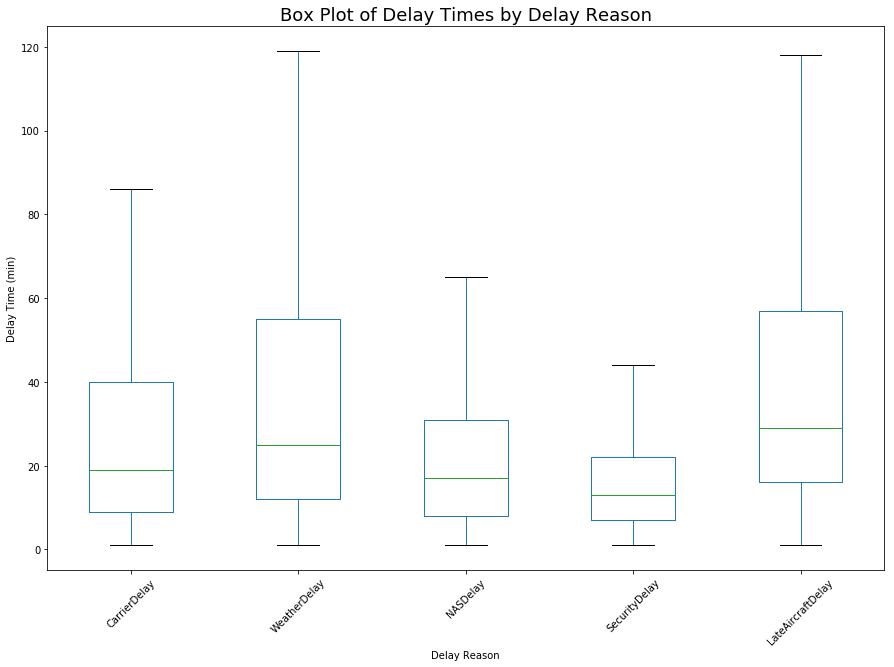

In [10]:
# box plot of the delay times for each delay reason
plt.figure(figsize = (15, 10));
df.boxplot(column = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], showfliers = False);
plt.xticks(rotation = 45);
plt.grid(b = None);
plt.ylabel('Delay Time (min)');
plt.xlabel('Delay Reason');
plt.title('Box Plot of Delay Times by Delay Reason', fontsize = 18);

## Line Plot of the Mean Delay Time by Reason and Month

> Weather and late aircraft have the largest mean delay times

> Depending on the delay reason, your flight will on average be delayed around 20 to 45 minutes if there is a delay

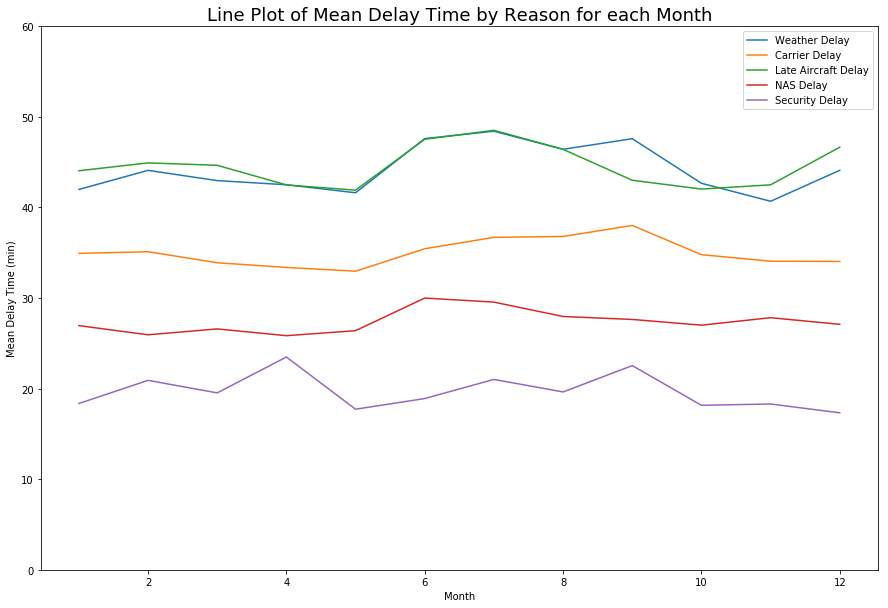

In [11]:
# line plot of mean delay time by delay reason and month
plt.figure(figsize = (15, 10));
df.groupby(['Month'])['WeatherDelay'].mean().plot.line();
df.groupby(['Month'])['CarrierDelay'].mean().plot.line();
df.groupby(['Month'])['LateAircraftDelay'].mean().plot.line();
df.groupby(['Month'])['NASDelay'].mean().plot.line();
df.groupby(['Month'])['SecurityDelay'].mean().plot.line();
plt.ylabel('Mean Delay Time (min)');
plt.ylim(0, 60);
plt.legend(labels = ['Weather Delay', 'Carrier Delay', 'Late Aircraft Delay', 'NAS Delay', 'Security Delay'], loc='upper right');
plt.title('Line Plot of Mean Delay Time by Reason for each Month', fontsize = 18);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!